 ## **Project Football Analysis Match Events**

##### *This project analyzes match events from the biggest 5 European football league: England, Spain, Germany, Italy, France from 2011/2012 season to 2016/2017 season as of 25.01.2017. Based on 'events.csv' files*

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [84]:
df_events = pd.read_csv('events.csv/events.csv')

In [85]:
pd.set_option('display.max_columns', None)
df_events


,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941004,z5L2OT5E/,z5L2OT5E123,123,92,Lucas Torreira (Sampdoria) wins a free kick in...,8,NaN,2,Sampdoria,Atalanta,lucas torreira,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
941005,z5L2OT5E/,z5L2OT5E124,124,93,"Corner, Sampdoria. Conceded by Andrea Masiello.",2,NaN,2,Sampdoria,Atalanta,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
941006,z5L2OT5E/,z5L2OT5E125,125,93,Attempt missed. Fabio Quagliarella (Sampdoria)...,1,12.0,2,Sampdoria,Atalanta,fabio quagliarella,lucas torreira,NaN,NaN,8.0,2.0,0,9.0,1.0,1,3.0,0
941007,z5L2OT5E/,z5L2OT5E126,126,94,Alberto Grassi (Atalanta) wins a free kick on ...,8,NaN,1,Atalanta,Sampdoria,alberto grassi,NaN,NaN,NaN,NaN,NaN,0,4.0,NaN,0,NaN,0


**Data Cleaning**

In [86]:
columns_remove = [
    'id_odsp','sort_order','time' , 'text', 'opponent', 'player2', 'player_in',
    'player_out', 'shot_place', 'shot_outcome', 'location',
    'bodypart', 'situation', 'fast_break', 'event_type2'
]

# Remove columns, ignoring if any do not exist (avoids error)
df_events = df_events.drop(columns=columns_remove, errors='ignore')
df_events



,id_event,event_type,side,event_team,player,is_goal,assist_method
0,UFot0hit1,1,2,Hamburg SV,mladen petric,0,1
1,UFot0hit2,2,1,Borussia Dortmund,dennis diekmeier,0,0
2,UFot0hit3,2,1,Borussia Dortmund,heiko westermann,0,0
3,UFot0hit4,3,1,Borussia Dortmund,sven bender,0,0
4,UFot0hit5,8,2,Hamburg SV,gokhan tore,0,0
...,...,...,...,...,...,...,...
941004,z5L2OT5E123,8,2,Sampdoria,lucas torreira,0,0
941005,z5L2OT5E124,2,2,Sampdoria,NaN,0,0
941006,z5L2OT5E125,1,2,Sampdoria,fabio quagliarella,0,1
941007,z5L2OT5E126,8,1,Atalanta,alberto grassi,0,0


In [87]:
# Geral structure

print("DF_EVENTS:")
print(df_events.shape)
print(df_events.info())

DF_EVENTS:
(941009, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id_event       941009 non-null  object
 1   event_type     941009 non-null  int64 
 2   side           941009 non-null  int64 
 3   event_team     941009 non-null  object
 4   player         880009 non-null  object
 5   is_goal        941009 non-null  int64 
 6   assist_method  941009 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 50.3+ MB
None


In [88]:
#Checking NULL values in df_events

print("Null values in df_events:")
print(df_events.isnull().sum())

Null values in df_events:
id_event             0
event_type           0
side                 0
event_team           0
player           61000
is_goal              0
assist_method        0
dtype: int64


In [107]:
df_events.to_csv("cleaned_data.csv", index=False)

In [89]:
print("Duplicates in df_events:")
duplicates = df_events.duplicated().sum()
total = len(df_events)
percentage = (duplicates / total) * 100
print(f"{percentage:.2f}%")

Duplicates in df_events:
0.00%


In [90]:
print("Unique values per column in df_events:")
print(df_events.nunique())

Unique values per column in df_events:
id_event         941009
event_type           11
side                  2
event_team          142
player             6118
is_goal               2
assist_method         5
dtype: int64


In [91]:
#Q1 - Who is the top 10 goals scorers?

#filter per events of goal
goals_df = df_events[df_events['is_goal'] > 0]

#counting goals by player
top_scorers = goals_df['player'].value_counts().head(10)
print(top_scorers)

player
lionel messi                205
cristiano ronaldo           198
zlatan ibrahimovic          153
robert lewandowski          124
edinson cavani              121
gonzalo higuain             118
pierreemerick aubameyang    100
luis suarez                  96
diego costa                  93
alexandre lacazette          88
Name: count, dtype: int64


In [92]:
goals = goals_df['player'].value_counts()
goals


player
lionel messi          205
cristiano ronaldo     198
zlatan ibrahimovic    153
robert lewandowski    124
edinson cavani        121
                     ... 
anthony jung            1
pablo caceres           1
matthias ostrzolek      1
paul seguin             1
borja mayoral           1
Name: count, Length: 3214, dtype: int64

Text(-3.6805555555555554, 0.5, 'Players')

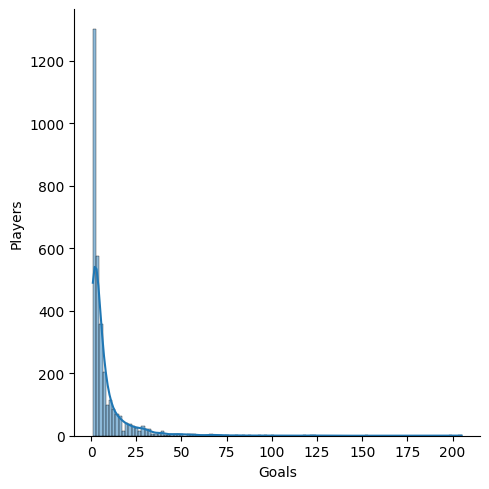

In [93]:
sns.displot(data=goals, kde=True) #Showing with the grafic that most has the average scorer player
plt.xlabel("Goals")
plt.ylabel("Players")


**Insighs:** *We can see from the grafic above that most of player has the goals average arounf of 25 goals.*

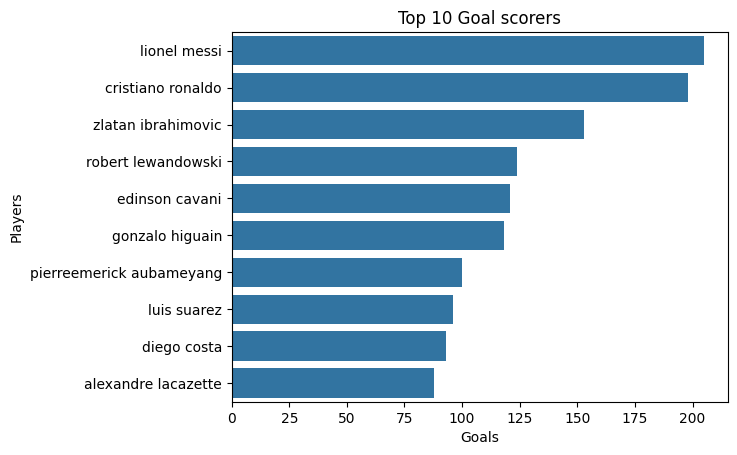

In [94]:
#Showing the the result by batplot
sns.barplot(x=top_scorers, y=top_scorers.index)
plt.title("Top 10 Goal scorers")
plt.xlabel("Goals")
plt.ylabel("Players")
plt.show(10)

**Insights:** *Now, we can see visually who is the players and datas and the process to obtain then.*

In [95]:
#Q2 - Who is the top 10 goals assist?

#filter per events of assist
assist_df = df_events[df_events['assist_method']> 0]

#counting assist by player 
top_assist = assist_df['player'].value_counts().head()
print(top_assist)


player
cristiano ronaldo     862
lionel messi          604
robert lewandowski    541
zlatan ibrahimovic    487
edinson cavani        483
Name: count, dtype: int64


Text(0, 0.5, 'Assistance')

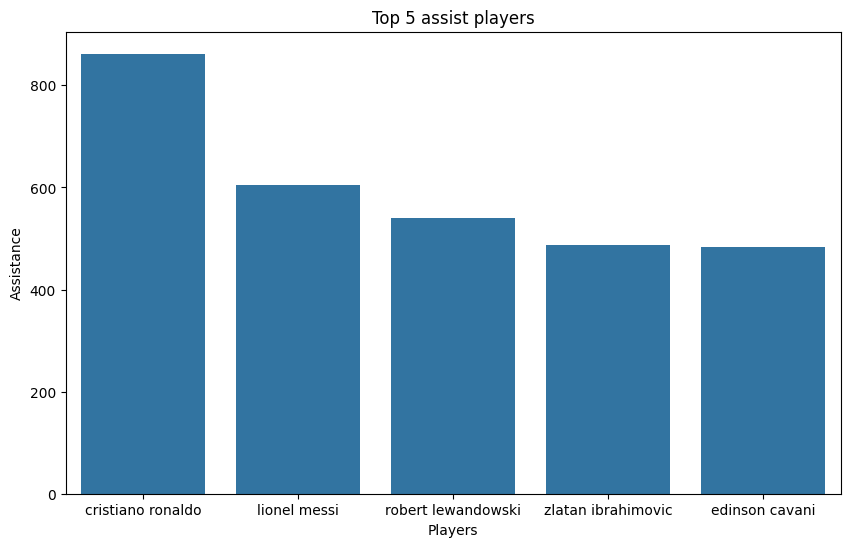

In [96]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_assist.index, y=top_assist)
plt.title("Top 5 assist players")
plt.xlabel("Players")
plt.ylabel("Assistance")

**Insights:** *With the two grafics (Top scorers and assist) we can see the good balance from two players Messi and Cristiano Ronaldo.*

In [97]:
#Q3 - Which teams has received most fouls?

#filter events of types of fault
foul_df = df_events[df_events['event_type'] == 3] # 3 = index of foul in the game 

#counting fault per team
foul_df = foul_df['event_team'].value_counts().head(5)
foul_df


event_team
Chievo Verona    3159
Genoa            3064
Lazio            3057
Espanyol         2982
Toulouse         2960
Name: count, dtype: int64

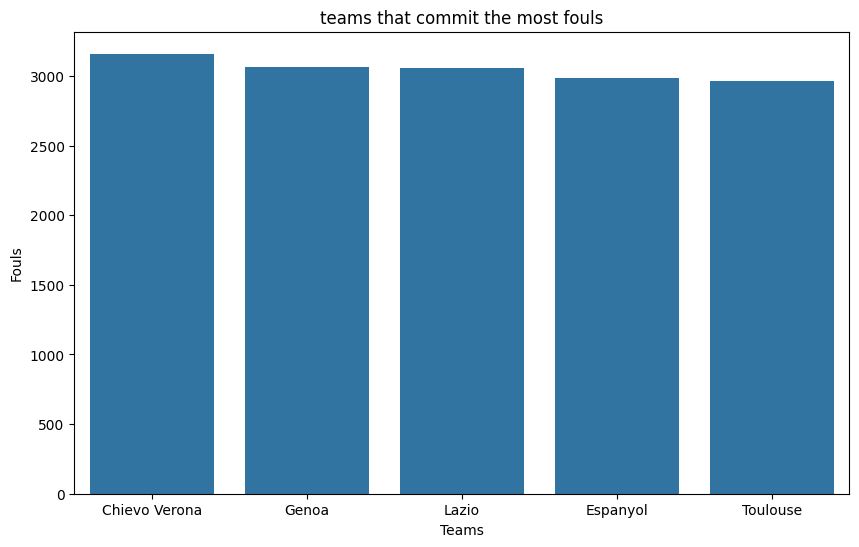

In [98]:
plt.figure(figsize=(10, 6))
sns.barplot(x=foul_df.index, y=foul_df)
plt.title("teams that commit the most fouls")
plt.xlabel("Teams")
plt.ylabel("Fouls")
plt.show()

In [99]:
counts_side= df_events['side'].value_counts().rename(index={1: 'Goals at home', 2: 'Goals away'})
counts_goals= df_events['is_goal'].value_counts().rename(index={0: 'no goal', 1: 'goal'})

In [100]:
counts_side


side
Goals at home    488224
Goals away       452785
Name: count, dtype: int64

In [101]:
counts_goals

is_goal
no goal    916563
goal        24446
Name: count, dtype: int64

Text(0.5, 1.0, 'Goals Rate')

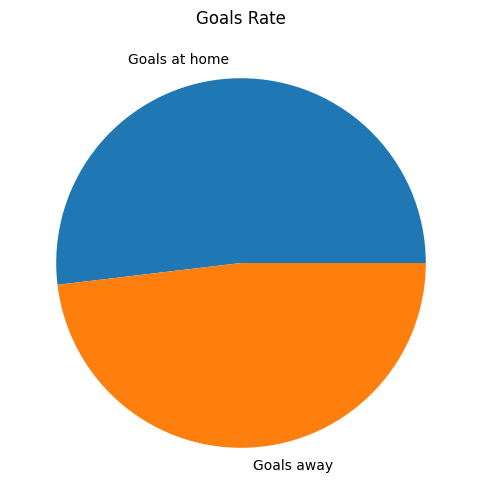

In [102]:
plt.figure(figsize=(6, 6))
plt.pie(counts_side, labels=counts_side.index)
plt.title("Goals Rate")



Text(0.5, 1.0, 'Proportion of goals and no goals of football matches: ')

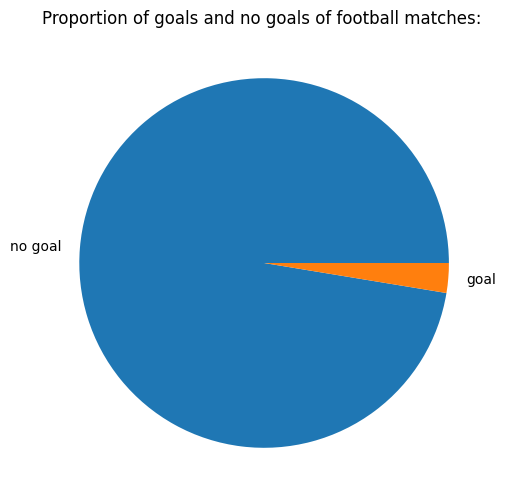

In [103]:
plt.figure(figsize=(6, 6))
plt.pie(counts_goals, labels=counts_goals.index)
plt.title("Proportion of goals and no goals of football matches: ")

**Insights:** *From the grafic above is possible to see that most of football matches it was without goals.*

In [104]:
#Q4 and 5 - Which teams is the most victory at home and away?

def get_most_victorious_teams(df_events):
    
    victory = df_events[df_events['side'] == 1] # 1 = wins at home , 2 = wins away
    home_winners = victory['event_team'].value_counts().head(3) #event_team = events per team


    victory = df_events[df_events['side'] == 2]
    away_winners = victory['event_team'].value_counts().head(3)

    return home_winners, away_winners

In [105]:
home_winners , away_winners = get_most_victorious_teams(df_events)

print("Most Home Victories:")
print(home_winners)

print("Most Away victories:")
print(away_winners)

Most Home Victories:
event_team
Fiorentina     6161
Real Madrid    6099
Juventus       6090
Name: count, dtype: int64
Most Away victories:
event_team
Juventus      5964
Fiorentina    5641
AC Milan      5574
Name: count, dtype: int64


C:\Users\vinyj\AppData\Local\Temp\ipykernel_34716\3825087006.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=home_winners.index, y=home_winners.values, palette="Blues_d")
C:\Users\vinyj\AppData\Local\Temp\ipykernel_34716\3825087006.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=away_winners.index, y=away_winners.values, palette="Greens_d")


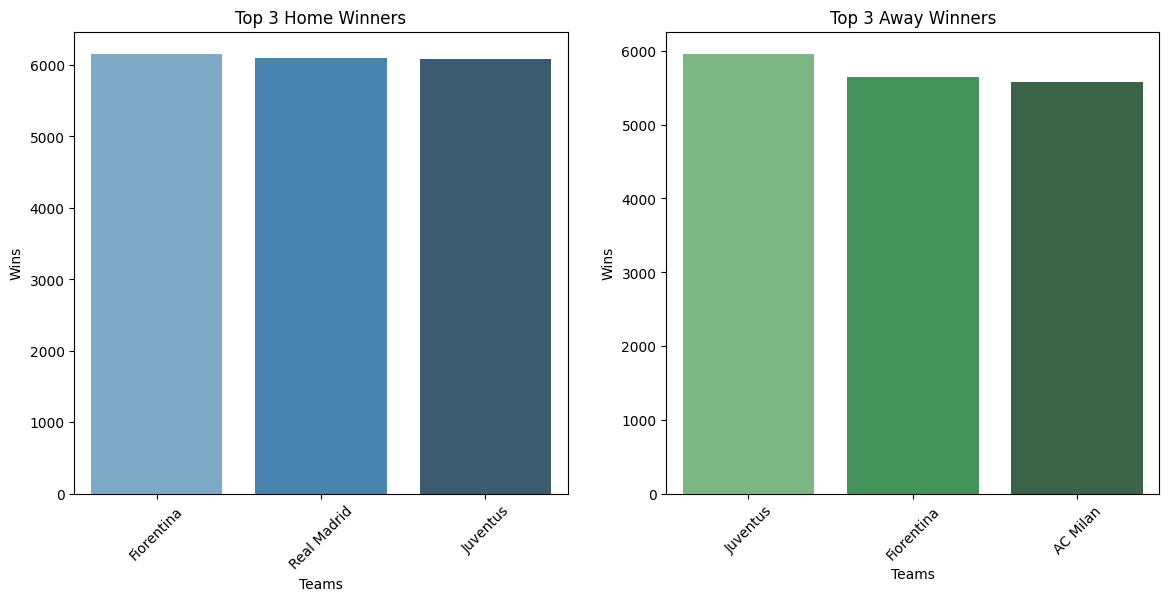

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Grafic1 - Home winners 
sns.barplot(ax=axes[0], x=home_winners.index, y=home_winners.values, palette="Blues_d")
axes[0].set_title("Top 3 Home Winners")
axes[0].set_xlabel("Teams")
axes[0].set_ylabel("Wins")
axes[0].tick_params(axis='x', rotation=45)

# Grafic 2 - Away winners 
sns.barplot(ax=axes[1], x=away_winners.index, y=away_winners.values, palette="Greens_d")
axes[1].set_title("Top 3 Away Winners")
axes[1].set_xlabel("Teams")
axes[1].set_ylabel("Wins")
axes[1].tick_params(axis='x', rotation=45)

**insights:** *We can see the  good balance about win the match at home or away from Fiorentina e Juventus.*